In [3]:
'''
Try to use graphing API to also do the independent cascade.
'''
import numpy as np
import networkx as nx
import string


Gph = nx.Graph()
Gph.add_nodes_from( list(string.ascii_uppercase)[:6] )

edges = [['A', 'B'], ['B', 'C'], ['B', 'D'],
         ['C','D'], ['C', 'E'], ['D', 'F'] ]

Gph.add_edges_from( edges )


nx.draw_networkx(Gph, label=True)

(this always happens)
Got P = 0.15616416931152344 chance of infecting node F after 1048576 trials
Expected {expected}


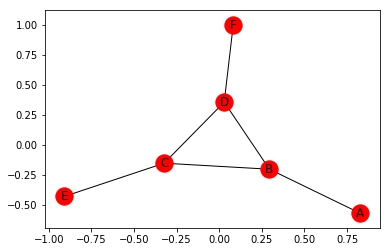

In [3]:
Gph.nodes

Gph.edges('B')

Gph.nodes['A']['tag'] = True

Gph.nodes['A']['tag']

# run simulations on the graph.
from collections import deque

# initialize the graph.
def reset(G):
    for node in G.nodes:
        G.nodes[node]['infected'] = False
    G.nodes['A']['infected'] = True
    initial = ['A']
    return initial


def infect(G, initial):
    infected = deque(initial)
    while infected:
        node = infected.popleft()
        nbrs = [ edge[-1] for edge in G.edges(node) ]

        for nbr in nbrs:
            if G.nodes[nbr]['infected'] == False:
                success = np.random.rand() > 0.5
                if success:
                    G.nodes[nbr]['infected'] = True
                    infected.append(nbr) # only add to the list once.

def get_infected(G):
    return list(filter(
        lambda node: G.nodes[node]['infected'],
        Gph.nodes ))

initial = reset(Gph)
infect(Gph, initial)

result = get_infected(Gph)
if 'F' in result:
    print('test run success!')
if 'A' in result:
    print('(this always happens)')

# from the Q5 rough work
expected = 0.15625

# run N experiments

counter = 0
N = 2 ** 20
for _ in range(N):
    initial = reset(Gph)
    infect(Gph, initial)
    result = get_infected(Gph)
    if 'F' in result:
        counter += 1
        
print(f'Got P = {counter / N} chance of infecting node F after {N} trials')
print('Expected {expected}')

# hey, looks good.